# twitter_archive数据清洗与数据分析
## 收集

In [1]:
!rm -rf ~/.cache/matplotlib/fontList.json
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf -O /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
import matplotlib.pyplot as plot 

plot.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plot.rcParams['axes.unicode_minus']=False #用来正常显示负号


/bin/sh: wget: command not found


In [3]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import html
import re
from csv import reader
import os
import json 
from bs4 import BeautifulSoup
import seaborn as sns

In [4]:
# 收集文件 1 保存为 dataframe
# twitter-archive-enhanced文本路径
twitter_archive_enhanced_filepath = 'twitter-archive-enhanced.txt'
# 直接使用 read_csv函数读取txt文件，转成csv文件
dataframe_enhanced = pd.read_csv(twitter_archive_enhanced_filepath)
# 保存数据到twitter_archive_enhanced.csv
dataframe_enhanced.to_csv('twitter-archive-enhanced.csv',index=0)


In [5]:
# 收集文件 2 保存为 dataframe
file_name = 'image-predictions.tsv'
# 使用requests.get 下载文本数据
response = requests.get("https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv")
# 打开文本image-predictions.tsv，并把数据写入到image-predictions.tsv里
with open(file_name, mode = 'wb') as file:
    file.write(response.content)


In [6]:
# 收集文件 3 保存为 dataframe（自己写的循环读取文件方法）
# 通过 with open 读取文本，逐行读取每行数据，写入dataframe
# tweet_json_filepath = 'tweet_json.txt' 
# with open(tweet_json_filepath, encoding='utf-8') as file:
#     lines = file.readlines()
#     # 先查看第一行数据
#     line0 = lines[0]
#     # 打印第一行数据，发现第一行数据是标题，逗号分隔
#     print('line0:', line0)
#     # 把第一行数据转成字典
#     json_data = json.loads(line0)
#     # 查看字典的有多少key
#     # 定义column_names，表示列名
#     column_names = json_data.keys()
#     print('column_names:', column_names)
#     # 只获取id，retweet_count，favorite_count 三列
#     column_names = ['tweet_id', 'retweet_count', 'favorite_count']
#     column_names_check = ['id', 'retweet_count', 'favorite_count']
#     # 查看字典中的所有值
#     #rowvalues = json_data.values()
#     #print('rowvalues:', rowvalues)
#     # 定义tweet_json数据表
#     tweet_json = pd.DataFrame(columns = column_names) #np.zeros((rows-1, columns))
#     #tweet_json.info()
    
#     #row = 0 
#     # 遍历数组
#     for line in lines[:]:
        
#         #print('行数：',row)
#         # 把json 字符串转成字典
#         json_line = json.loads(line)
#         # 定义行列表
#         column_list = []
#         #print('行值：',json_line)
#         for key in column_names_check:
#             if(key in json_line.keys()):
#                 column_list.append(json_line[key])
#             else:
#                 column_list.append(None)
                
                
#         # 赋值
#         df_add = pd.DataFrame([column_list], columns = column_names)
#         tweet_json = tweet_json.append(df_add, ignore_index=True)
#         #row += 1
  
#     #tweet_json.head()
#     # 保存tweet_json表数据
#     tweet_json.to_csv('twitter.csv',index=0)

In [7]:
#  收集文件 3 （评阅老师指导的方法）
# 使用read_json读取json文本，获取需要的三列数据（'id', 'retweet_count', 'favorite_count'）
df_json = pd.read_json('tweet_json.txt',lines=True)[['id', 'retweet_count', 'favorite_count']]
df_json.columns = ['tweet_id', 'retweet_count', 'favorite_count']
# 保存tweet_json表数据
df_json.to_csv('twitter.csv',index=0)

## 评估
### 目测评估

In [8]:
# 查看twitter_archive_enhanced表数据
# 检查twitter_archive_enhanced表数据
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
# 检查image_predictions表数据
image_predictions = pd.read_csv('image-predictions.tsv',sep ="\t")
image_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# 查看image_predictions表数据
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
# 检查twitter.csv表数据
twitter = pd.read_csv('twitter.csv')
twitter.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [13]:
# 查看twitter表数据
twitter

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467



### 编程评估

In [14]:
# 合并三个数据表进行观察

In [15]:
# 使用inner合并数据集进行观察
twitter_archive_enhanced_master = twitter_archive_enhanced.merge(image_predictions, how='inner', on='tweet_id').merge(twitter, how='inner', on='tweet_id')


In [16]:
# 检查合并后数据集
twitter_archive_enhanced_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

In [17]:
# 查看合并后数据集的数据
twitter_archive_enhanced_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3240,20548
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2142,12053
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,19548,66596
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4403,28187
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7684,32467


In [18]:
# 使用outer合并数据集twitter_archive_enhanced_master2查看数据
twitter_archive_enhanced_master2 = twitter_archive_enhanced.merge(image_predictions, how='outer', on='tweet_id').merge(twitter, how='outer', on='tweet_id')


In [19]:
twitter_archive_enhanced_master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [20]:
# 先刷选图片jpg_url不为空的数据
twitter_archive_enhanced_master2 = twitter_archive_enhanced_master2[twitter_archive_enhanced_master2['jpg_url'].notnull()]


In [21]:
twitter_archive_enhanced_master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

In [22]:
# 转发数 跟喜爱数也有缺失值
# 先刷选retweet_count不为空的数据
twitter_archive_enhanced_master2 = twitter_archive_enhanced_master2[twitter_archive_enhanced_master2['retweet_count'].notnull()]


In [23]:
twitter_archive_enhanced_master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

In [24]:
# 发现用inner能直接得到我们想要的数据集，用outer合并的数据还需要进行多步处理；
# 下面用inner合并的数据集twitter_archive_enhanced_master进行评估

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

In [25]:
# 检查twitter_archive_enhanced_master
twitter_archive_enhanced_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

In [26]:
# 发现timestamp为字符串格式； 应为时间格式；

In [27]:
# 查看合并后的数据集数据
twitter_archive_enhanced_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3240,20548
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2142,12053
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,19548,66596
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4403,28187
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7684,32467


In [28]:
# 发现source为html标签； 应去掉html标签只需要标签里面的内容；
# 列p1，p2，p3有大写有小写，统一小写

In [29]:
# 存在转发retweeted_status_id的数据，查看转发的数据有哪些

twitter_archive_enhanced_master[twitter_archive_enhanced_master['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True,19188,0
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,82,0
81,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,...,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False,12435,0
109,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,...,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True,134,0
132,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,...,0.933016,False,oscilloscope,0.012591,False,paper_towel,0.011178,False,879,0
169,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,...,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True,10647,0
170,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,...,0.662183,False,purse,0.066505,False,pillow,0.044725,False,23,0
185,847971574464610304,NaN,NaN,2017-04-01 00:39:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @basic_vacek_: I love my new mug easy 13/10...,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,...,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False,479,0
208,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,...,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,56373,0
214,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ken. His cheeks are mag...,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,...,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True,17399,0


In [30]:
# 查看expanded_urls，
twitter_archive_enhanced_master['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/692828166163931137/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/685906723014619143/photo/1,https://twitter.com/dog_rates/status/685906723014619143/photo/1                                                                    1
https://twitter.com/dog_rates/status/687317306314240000/photo/1,https://twitter.com/dog_rates/status/687317306314240000/photo/1                                                                    1
https://twitter.com/dog_rates/status/823939628516474880/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/822610361945911296/photo/1                                                                                                                                    1
https://twitter

In [31]:
# 查看expanded_urls有没有重复值
sum(twitter_archive_enhanced_master['expanded_urls'].duplicated())

0

In [32]:
# 查看jpg_url有没有重复值
sum(twitter_archive_enhanced_master['jpg_url'].duplicated())

64

In [33]:
# 查看twitter_archive_enhanced_master哪些列有缺失值
twitter_archive_enhanced_master.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2050
in_reply_to_user_id           2050
timestamp                        0
source                           0
text                             0
retweeted_status_id           1994
retweeted_status_user_id      1994
retweeted_status_timestamp    1994
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
jpg_url                          0
img_num                          0
p1                               0
p1_conf                          0
p1_dog                           0
p2                               0
p2_conf                          0
p2_dog                           0
p3                               0
p3_conf                          0
p3_dog                           0
retweet_count       

In [34]:
# 在目测哪里看到评分分子rating_numerator为0的数据
twitter_archive_enhanced_master[twitter_archive_enhanced_master['rating_numerator'] ==0][['tweet_id','text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
248,835152434251116546,When you're so blinded by your systematic plag...,0,10
832,746906459439529985,"PUPDATE: can't see any. Even if I could, I cou...",0,10


In [35]:

# 在目测哪里看到评分分母数据大部分是10，查出评分分母有不是10的数据有哪些， 有问题的修正
twitter_archive_enhanced_master[twitter_archive_enhanced_master['rating_denominator'] !=10][['tweet_id','text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
344,820690176645140481,The floofs have been released I repeat the flo...,84,70
414,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
734,758467244762497024,Why does this never happen at my front door......,165,150
876,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
924,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [36]:
# 查看评分分子的数据，倒序查询
twitter_archive_enhanced_master.sort_values(by = 'rating_numerator', ascending = False)[['tweet_id','rating_numerator']]


,tweet_id,rating_numerator
802,749981277374128128,1776
1795,670842764863651840,420
924,731156023742988288,204
734,758467244762497024,165
1512,677716515794329600,144
1379,684225744407494656,143
1380,684222868335505415,121
1022,713900603437621249,99
1571,675853064436391936,88
344,820690176645140481,84


In [37]:
# 检查twitter_archive_enhanced_master是否有重复值
sum(twitter_archive_enhanced_master.duplicated())

0

In [38]:
# 检查tweet_id是否有重复值
sum(twitter_archive_enhanced_master['tweet_id'].duplicated())

0

In [39]:
# 名字存在a,an,the等不规范的名称，代码查看名字是否正确
twitter_archive_enhanced_master[twitter_archive_enhanced_master['name'].str.islower()][['text', 'name']]

,text,name
21,I've yet to rate a Venezuelan Hover Wiener. Th...,such
50,Here is a pupper approaching maximum borkdrive...,a
140,We only rate dogs. This is quite clearly a smo...,quite
154,"Guys, we only rate dogs. This is quite clearly...",quite
292,"Occasionally, we're sent fantastic stories. Th...",one
437,We only rate dogs. Please stop sending in non-...,incredibly
523,Here is a perfect example of someone who has t...,a
609,RT @dog_rates: This is an East African Chalupa...,an
646,Guys this is getting so out of hand. We only r...,a
662,We only rate dogs. Pls stop sending in non-can...,very


In [40]:
# 查看有没有2017 年 8 月 1 日之后的的数据,2017-08-01 23:59:59
twitter_archive_enhanced_master[twitter_archive_enhanced_master['timestamp'] > '2017-08-01 23:59:59'] 


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


#### - 三个数据集先合并为一个数据集；合并为一个twitter_archive_master数据集；再进行清理
#### 质量
##### `twitter_archive_enhanced_master.csv` 表格
- 包含的转发数据，需要清除
- jpg_url 有重复数据，删除；
- （in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp）这几列数据缺失比较多，可删除掉这些列；
- timestamp 时间不是日期格式；
- source 来源列是个标签文本，去掉标签，只显示来源内容
- 评分分母列（rating_denominator）有个别数据不是10；修正；
- 列name 名字小写的是拼写错误，a,an the...none等错误字段，改成nan值
- 列p1，p2，p3有大写有小写，改成小写



#### 整洁度
- twitter_archive_enhanced_master.csv 表里面 doggo、floor、pupper、puppo 代表狗的类型，应该合并为一列
- twitter_archive_enhanced_master.csv 表里面 rating_numerator、rating_denominator ，都是评分，应该合并为一列rateing 评分列
- twitter_archive_enhanced_master.tsv 表里面列p1，p2，p3这三列都是描述狗的种类应该为一列；p1_conf，p2_conf，p3_conf这三列是也应该合并为一列；p1_dog，p2_dog，p3_dog这三列也应该合并为一列；



## 清理

In [41]:
# 备份三个数据集
twitter_archive_enhanced.to_csv('twitter-archive-enhanced-backup.csv')
image_predictions.to_csv('image-predictions-backup.tsv')
twitter.to_csv('twitter-backup.csv')


In [42]:
# 保存合并的数据集
twitter_archive_enhanced_master.to_csv('twitter_archive_master.tsv')

In [43]:
#重新定义clean数据集
twitter_archive_master_clean = twitter_archive_enhanced_master.copy()

## 质量问题

## twitter_archive_master.csv 表质量问题

### 定义

数据包含的转发数据，需要清除，刷选不是转发的推特

### 代码

In [44]:
twitter_archive_master_clean = twitter_archive_master_clean[twitter_archive_master_clean['retweeted_status_id'].isnull()]


### 测试

In [45]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

### 定义

jpg_url 有重复数据，删除

### 代码

In [46]:
twitter_archive_master_clean.drop_duplicates('jpg_url',inplace=True)

### 测试

In [47]:
# 查看jpg_url有没有重复值
sum(twitter_archive_master_clean['jpg_url'].duplicated())

0

In [48]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

### 定义

in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp）这几列数据缺失比较多，可删除掉这些列；

### 代码

In [49]:
# （in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp）这几列数据缺失比较多，可删除掉这些列；
twitter_archive_master_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)


### 测试

In [50]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null obj

### 定义

timestamp 时间不是日期格式；改成时间格式

### 代码

In [51]:
# 解决timestamp 时间不是日期格式；改成时间格式
twitter_archive_master_clean['timestamp'] = pd.to_datetime(twitter_archive_master_clean['timestamp'])

### 测试

In [52]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994

### 定义

source 来源列是个标签文本，去掉标签，只显示来源内容

### 代码

In [53]:
# source 来源列是个标签文本，去掉标签，只显示来源内容
# （自己方法用BeautifulSoup刷选出text内容）
#twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean['source'].apply(lambda t: BeautifulSoup(t, "html.parser").get_text()) 
#  （评阅老师指导的用正则表达式的方法）
twitter_archive_master_clean['source'] = twitter_archive_master_clean['source'].str.extract('>(.*)<',expand = True)


### 测试

In [54]:
twitter_archive_master_clean['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
               ...        
2043    Twitter for iPhone
2044    Twitter for iPhone
2045    Twitter for iPhone
2046    Twitter for iPhone
2047    Twitter for iPhone
2048    Twitter for iPhone
2

### 定义

评分分母列（rating_denominator）有个别数据不是10；先查看评分分母列有哪些数据不是10；

### 代码

In [55]:
pd.set_option('display.max_colwidth', 1000)
# 先查看哪些评分分母列（rating_denominator）有个别数据不是10的数据
twitter_archive_master_clean[twitter_archive_master_clean['rating_denominator'] !=10][['tweet_id','text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
344,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
414,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [56]:
# 评分分母列（rating_denominator）有个别数据不是10；修正
# 行876 有问题，应该是14/10
# 行967 有问题，应该是13/10
# 行1001 有问题，应该是11/10
# 行1405 有问题，应该是10/10
# 行2052 有问题，应该是9/10

twitter_archive_master_clean.loc[876,"rating_numerator"] = 14
twitter_archive_master_clean.loc[876,"rating_denominator"] = 10

twitter_archive_master_clean.loc[967,"rating_numerator"] = 13
twitter_archive_master_clean.loc[967,"rating_denominator"] = 10

twitter_archive_master_clean.loc[1001,"rating_numerator"] = 11
twitter_archive_master_clean.loc[1001,"rating_denominator"] = 10

twitter_archive_master_clean.loc[1405,"rating_numerator"] = 10
twitter_archive_master_clean.loc[1405,"rating_denominator"] = 10

twitter_archive_master_clean.loc[2052,"rating_numerator"] = 9
twitter_archive_master_clean.loc[2052,"rating_denominator"] = 10


### 测试

In [57]:
# 再次查看哪些评分分母列（rating_denominator）有个别数据不是10的数据
twitter_archive_master_clean[twitter_archive_master_clean['rating_denominator'] !=10][['tweet_id','text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
344,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
414,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1131,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1207,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1379,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130


### 定义

列name 名字小写的是拼写错误，a,an the...none等错误字段，改成nan值

### 代码

In [58]:
# 定义需要替换的名称列表，（评阅老师给出优化方法）
mask = (twitter_archive_master_clean.name.str.islower())|(twitter_archive_master_clean.name == 'None')
twitter_archive_master_clean.loc[mask, 'name'] = np.nan

### 测试

In [59]:
twitter_archive_master_clean[(twitter_archive_master_clean['name'].notnull()) & (twitter_archive_master_clean['name'].str.islower())][['text', 'name']]


,text,name


### 定义

列p1，p2，p3有大写有小写，改成小写

### 代码

In [60]:
# 列p1，p2，p3有大写有小写，统一小写
# 自己代码方法
# twitter_archive_master_clean['p1'] = twitter_archive_master_clean['p1'].apply(lambda n: n.lower() if n != None else n)
# twitter_archive_master_clean['p2'] = twitter_archive_master_clean['p2'].apply(lambda n: n.lower() if n != None else n)
# twitter_archive_master_clean['p3'] = twitter_archive_master_clean['p3'].apply(lambda n: n.lower() if n != None else n)

# 评审老师指导方法
twitter_archive_master_clean['p1'] = twitter_archive_master_clean['p1'].str.lower()
twitter_archive_master_clean['p2'] = twitter_archive_master_clean['p2'].str.lower()
twitter_archive_master_clean['p3'] = twitter_archive_master_clean['p3'].str.lower()


### 测试

In [61]:
twitter_archive_master_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,german_short-haired_pointer
5,chesapeake_bay_retriever,irish_terrier,indian_elephant
6,appenzeller,border_collie,ice_lolly
7,pomeranian,eskimo_dog,pembroke
8,irish_terrier,irish_setter,chesapeake_bay_retriever
9,pembroke,cardigan,chihuahua


## 整洁度

### twitter_archive_enhanced_maste.csv 表整洁度

### 定义

twitter_archive_enhanced_maste.csv 表里面 doggo、floor、pupper、puppo 代表狗的类型，应该合并为stage列，并删除掉列（doggo、floor、pupper、puppo ）

### 代码

In [62]:
# 查询需要整合的列的数据
stage_df = twitter_archive_master_clean[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']]

In [63]:
# 把None设置0 ；'doggo', 'floofer', 'pupper', 'puppo' 都设置为1
stage_replace_df = stage_df.replace({'None':0, 'doggo':1, 'floofer':1, 'pupper':1, 'puppo':1})

In [64]:
# 整合重新设置的表列为stage
stage_replace_df2 = stage_replace_df.melt('tweet_id', var_name = 'stage')

In [65]:
# 查询值为1的数据，并删除value列
final = stage_replace_df2.query('value == 1').drop(['value'], axis=1)

In [66]:
# 查看重复的tweet_id数据有哪些
final[final.duplicated('tweet_id')]

,tweet_id,stage
2148,854010172552949760,floofer
4328,817777686764523521,pupper
4385,808106460588765185,pupper
4407,802265048156610565,pupper
4413,801115127852503040,pupper
4498,785639753186217984,pupper
4640,759793422261743616,pupper
4692,751583847268179968,pupper
4783,741067306818797568,pupper
4829,733109485275860992,pupper


In [67]:
final[final['tweet_id'] == 817777686764523521]

,tweet_id,stage
340,817777686764523521,doggo
4328,817777686764523521,pupper


In [68]:
# 删除所有重复的数据
final_new = final.drop_duplicates(subset = ['tweet_id'], keep = False)

In [69]:
# 删除'doggo', 'floofer', 'pupper', 'puppo'的列
twitter_archive_master_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1,inplace = True)

In [70]:
# 数据合并新整合的数据集
twitter_archive_master_clean = twitter_archive_master_clean.merge(final_new,how="left",on="tweet_id")

### 测试

In [71]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1350 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 n

### 定义

 twitter-archive-enhanced.csv 表里面 rating_numerator、rating_denominator ，都是评分，应该合并为一列rateing 评分列

### 代码

In [72]:
# 向表里面增加列rating； rating_numerator/rating_denominator 
twitter_archive_master_clean['rating'] = twitter_archive_master_clean['rating_numerator'] / twitter_archive_master_clean['rating_denominator']


In [73]:
# 删掉列rating_numerator，rating_denominator
twitter_archive_master_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace = True)

### 测试

In [74]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id          1994 non-null int64
timestamp         1994 non-null datetime64[ns, UTC]
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1350 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
stage             295 non-null object
rating            1994 non-null float64
dtypes: bool(3), datetime64[ns, UTC](1), float64(4), int64(4), objec

### 定义

里面列p1，p2，p3这三列都是描述狗的种类应该为一列；命名为prediction_dog，p1_conf，p2_conf，p3_conf这三列是也应该合并为一列，命名为prediction_conf；p1_dog；然后删除掉p1，p2，p3，p1_conf，p2_conf，p3_conf，p2_dog，p3_dog这些列；

### 代码

In [75]:
# 刷选预测dog跟预测参数，刷选预测最高的，并且是狗的
# prediction_dog = []
# prediction_conf= []

# def filter_prediction_conf(row):
#     # 定义一个参数列表conf_list
#     conf_list = [row['p1_conf'], row['p2_conf'], row['p3_conf']] 
#     # 定义一个预测字典p_dict
#     p_dict = {'k_'+str(row['p1_conf']): {'p': row['p1'], 'p_conf': row['p1_conf'], 'p_dog': row['p1_dog']}, 
#              'k_'+str(row['p2_conf']): {'p': row['p2'], 'p_conf': row['p2_conf'], 'p_dog': row['p2_dog']},
#              'k_'+str(row['p3_conf']): {'p': row['p3'], 'p_conf': row['p3_conf'], 'p_dog': row['p3_dog']}}
    
#     #print('p_dict',p_dict)
#     # conf_list降序
#     conf_list.sort(reverse=True)
#     #print('conf_list',conf_list)
#     # 定义预测的狗默认值none ，定义预测的参数默认值0
#     dog_value = 'undefined_dog'
#     conf_value = 0
#     for conf in conf_list:
#         dic = p_dict.get('k_'+str(conf))
#         #print('dic',dic)
#         if dic.get('p_dog'):
#             dog_value = dic.get('p')
#             conf_value = dic.get('p_conf')
#             #print('dog_value',dog_value)
#             #print('conf_value',conf_value)
#             break;
#     prediction_dog.append(dog_value)
#     prediction_conf.append(conf_value)
    

# # 测试
# #filter_prediction_conf(image_predictions_clean.iloc[0])

# image_predictions_clean.apply(filter_prediction_conf, axis = 1)

# image_predictions_clean['prediction_dog'] = prediction_dog
# image_predictions_clean['prediction_conf'] = prediction_conf

In [76]:
# 评阅老师指导方法
def get_breed(item):
    if item['p1_dog']==True:
        item['prediction_dog'] = item['p1']
        item['prediction_conf'] = item['p1']
    elif item['p2_dog']==True:
        item['prediction_dog'] = item['p2']
        item['prediction_conf'] = item['p2']
    elif item['p3_dog']==True:
        item['prediction_dog'] = item['p3']
        item['prediction_conf'] = item['p3']
    else:
        item['prediction_dog'] = 'undefined_dog'
        item['prediction_conf'] = 0
    return item
twitter_archive_master_clean = twitter_archive_master_clean.apply(get_breed,axis=1)

In [77]:
# 删除p1~p3 数据
twitter_archive_master_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog'],axis = 1,inplace=True)


### 测试

In [78]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id           1994 non-null int64
timestamp          1994 non-null datetime64[ns, UTC]
source             1994 non-null object
text               1994 non-null object
expanded_urls      1994 non-null object
name               1350 non-null object
jpg_url            1994 non-null object
img_num            1994 non-null int64
retweet_count      1994 non-null int64
favorite_count     1994 non-null int64
stage              295 non-null object
rating             1994 non-null float64
prediction_dog     1994 non-null object
prediction_conf    1994 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(8)
memory usage: 233.7+ KB


In [79]:
twitter_archive_master_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,retweet_count,favorite_count,stage,rating,prediction_dog,prediction_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,8842,39492,NaN,1.3,undefined_dog,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,6480,33786,NaN,1.3,chihuahua,chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,4301,25445,NaN,1.2,chihuahua,chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,8925,42863,NaN,1.3,labrador_retriever,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,9721,41016,NaN,1.2,basset,basset


### 对清理后的数据集再次评估

### 代码

In [80]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id           1994 non-null int64
timestamp          1994 non-null datetime64[ns, UTC]
source             1994 non-null object
text               1994 non-null object
expanded_urls      1994 non-null object
name               1350 non-null object
jpg_url            1994 non-null object
img_num            1994 non-null int64
retweet_count      1994 non-null int64
favorite_count     1994 non-null int64
stage              295 non-null object
rating             1994 non-null float64
prediction_dog     1994 non-null object
prediction_conf    1994 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(8)
memory usage: 233.7+ KB


In [81]:
twitter_archive_master_clean

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,retweet_count,favorite_count,stage,rating,prediction_dog,prediction_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,8842,39492,NaN,1.3,undefined_dog,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,6480,33786,NaN,1.3,chihuahua,chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,4301,25445,NaN,1.2,chihuahua,chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,8925,42863,NaN,1.3,labrador_retriever,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,9721,41016,NaN,1.2,basset,basset
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,3240,20548,NaN,1.3,chesapeake_bay_retriever,chesapeake_bay_retriever
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,2142,12053,NaN,1.3,appenzeller,appenzeller
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,19548,66596,NaN,1.3,pomeranian,pomeranian
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,4403,28187,NaN,1.3,irish_terrier,irish_terrier
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassi

### 代码评估

In [82]:
# 查看整合后的stage
twitter_archive_master_clean['stage'].value_counts()

pupper     203
doggo       63
puppo       22
floofer      7
Name: stage, dtype: int64

In [83]:
# 查看整合后的stage；发现个别177.6.3.4.2.6，42个别差别比较大的概率，大部分都是小于2
twitter_archive_master_clean['rating'].value_counts()

1.200000      454
1.000000      421
1.100000      403
1.300000      262
0.900000      152
0.800000       95
0.700000       51
1.400000       36
0.500000       33
0.600000       32
0.300000       19
0.400000       15
0.200000        9
0.100000        4
0.000000        2
177.600000      1
3.428571        1
2.600000        1
42.000000       1
7.500000        1
2.700000        1
Name: rating, dtype: int64

In [84]:
# 查看rating大于2的数据
twitter_archive_master_clean[twitter_archive_master_clean['rating'] >2]

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,retweet_count,favorite_count,stage,rating,prediction_dog,prediction_conf
385,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,1647,5904,NaN,3.428571,golden_retriever,golden_retriever
503,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,7033,20221,NaN,7.500000,pomeranian,pomeranian
553,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,1867,7292,pupper,2.700000,clumber,clumber
726,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,2769,5594,NaN,177.600000,undefined_dog,0
1374,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,NaN,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,542,1868,NaN,2.600000,kuvasz,kuvasz
1718,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,9509,25673,NaN,42.000000,undefined_dog,0


In [85]:
# 查看整合后的prediction_dog
twitter_archive_master_clean['prediction_dog'].value_counts()

undefined_dog                     308
golden_retriever                  158
labrador_retriever                108
pembroke                           95
chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
samoyed                            42
pomeranian                         42
malamute                           33
french_bulldog                     31
chesapeake_bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 25
eskimo_dog                         22
cardigan                           21
german_shepherd                    21
staffordshire_bullterrier          21
siberian_husky                     20
beagle                             20
shih-tzu                           20
rottweiler                         19
shetland_sheepdog                  19
maltese_dog                        19
kuvasz                             18
lakeland_ter

## 质量
##### `twitter_archive_master_clean` 数据集
- 整合后数据的列rating存在个别数据比较大；有比例177，42不正常数据，修正，还有大部分都是取小数点一位的，把rating取小数点后一位；

## 清理

### 定义

整合后数据的列rating存在个别数据比较大；有比例177，42不正常数据，修正，还有大部分都是取小数点一位的，把rating取小数点后一位；

### 代码

In [86]:
# 查看rating大于2的数据
twitter_archive_master_clean[twitter_archive_master_clean['rating'] >2]

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,retweet_count,favorite_count,stage,rating,prediction_dog,prediction_conf
385,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,1647,5904,NaN,3.428571,golden_retriever,golden_retriever
503,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,7033,20221,NaN,7.500000,pomeranian,pomeranian
553,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,1867,7292,pupper,2.700000,clumber,clumber
726,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,2769,5594,NaN,177.600000,undefined_dog,0
1374,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,NaN,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,542,1868,NaN,2.600000,kuvasz,kuvasz
1718,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,9509,25673,NaN,42.000000,undefined_dog,0


In [87]:
# 行503 中的rating 应该是9.75/10
# 行553 中的rating 应该是11.27/10
# 行1374 中rating 应该是11.26/10 
twitter_archive_master_clean.loc[503,"rating"] = 9.75/10
twitter_archive_master_clean.loc[553,"rating"] = 11.27/10
twitter_archive_master_clean.loc[1374,"rating"] = 11.26/10

# 行385，726，1718数值偏差太大，并且不是狗的，可以删除掉
twitter_archive_master_clean.drop(twitter_archive_master_clean.index[[385,726,1718]],inplace=True)

In [88]:
twitter_archive_master_clean['rating'] = twitter_archive_master_clean['rating'].round(decimals = 1)

### 测试

In [89]:
twitter_archive_master_clean['rating'].value_counts()

1.2    454
1.0    422
1.1    405
1.3    262
0.9    152
0.8     95
0.7     51
1.4     36
0.5     33
0.6     32
0.3     19
0.4     15
0.2      9
0.1      4
0.0      2
Name: rating, dtype: int64

### 保存清理的数据集

In [90]:
# 把合并清理后的数据集保存为twitter_archive_master.csv文件
twitter_archive_master_clean.to_csv('twitter_archive_master.csv')

In [91]:
# 查看保存后数据集
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [92]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 15 columns):
Unnamed: 0         1991 non-null int64
tweet_id           1991 non-null int64
timestamp          1991 non-null object
source             1991 non-null object
text               1991 non-null object
expanded_urls      1991 non-null object
name               1348 non-null object
jpg_url            1991 non-null object
img_num            1991 non-null int64
retweet_count      1991 non-null int64
favorite_count     1991 non-null int64
stage              295 non-null object
rating             1991 non-null float64
prediction_dog     1991 non-null object
prediction_conf    1991 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 233.4+ KB


## 分析和可视化

#### 通过查看推特上dogs表的信息，希望从数据里得到以下信息：
- 推特上哪些狗的转发数（retweet count）最多的（前10）；
- 推特上哪些狗的喜爱数（favorite count）最多的（前10）；
- 推特上哪些狗的评分（rating）最好的（前10）；
- 推特上文章转发数与喜爱数的关系；
- 推特上转发数与喜爱数最多的狗是否评分越好；
- 推特上评分最好转发数与喜爱数最多的狗是那种狗；


In [93]:
# 获取数据集
twitter_df = pd.read_csv('twitter_archive_master.csv')

In [163]:
# 定义需要采集的数据列,prediction_dog不为空，并且 prediction_dog 是狗的数据集（undefined_dog 预测不是狗）
twitter_columns = ['tweet_id', 'source', 'jpg_url', 'retweet_count', 'favorite_count', 'rating', 'prediction_dog', 'prediction_conf', 'timestamp']
twitter_dogs_df = twitter_df[(twitter_df.prediction_dog.notnull()) & (twitter_df.prediction_dog != 'undefined_dog')][twitter_columns]

In [164]:
twitter_dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 1 to 1988
Data columns (total 9 columns):
tweet_id           1684 non-null int64
source             1684 non-null object
jpg_url            1684 non-null object
retweet_count      1684 non-null int64
favorite_count     1684 non-null int64
rating             1684 non-null float64
prediction_dog     1684 non-null object
prediction_conf    1684 non-null object
timestamp          1684 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 131.6+ KB


In [165]:
# 推特上哪些狗的转发数（retweet count）最多的
twitter_dogs_df.groupby(['prediction_dog'])['retweet_count'].sum().sort_values(ascending=False).head(10)


prediction_dog
golden_retriever      588494
labrador_retriever    405312
pembroke              290602
chihuahua             253916
samoyed               202313
french_bulldog        155290
cocker_spaniel        147681
chow                  133512
pug                   118051
toy_poodle            115125
Name: retweet_count, dtype: int64

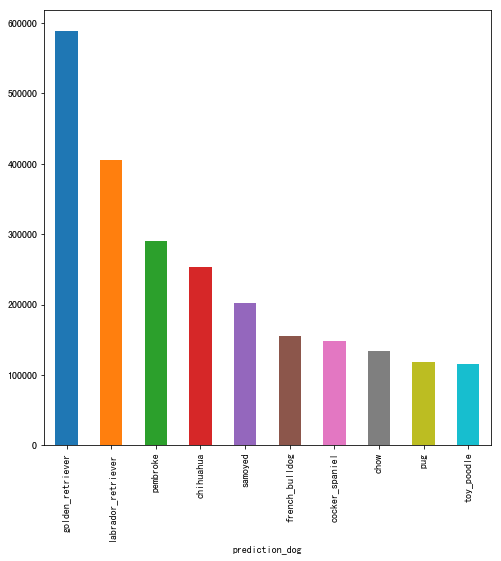

In [166]:
# 使用图表展示推特上哪些狗的转发数（retweet count）最多的
twitter_dogs_df.groupby(['prediction_dog'])['retweet_count'].sum().sort_values(ascending = False).head(10).plot(kind='bar',figsize=(8,8))


### 从图表可以看出（golden_retriever, labrador_retriever, chihuahua, pembroke, samoyed, cocker_spaniel, rench_bulldog, chow, pug, toy_poodle ）这几种狗转发数最多，其中golden_retriever转发数最高

In [167]:
# 推特上哪些狗的喜爱数（favorite count）最多的（前10）
twitter_dogs_df.groupby('prediction_dog')['favorite_count'].sum().sort_values(ascending=False).head(10)


prediction_dog
golden_retriever      1950826
labrador_retriever    1269771
pembroke              1036321
chihuahua              756715
samoyed                582082
french_bulldog         568978
chow                   456699
cocker_spaniel         413968
pug                    382463
malamute               350710
Name: favorite_count, dtype: int64

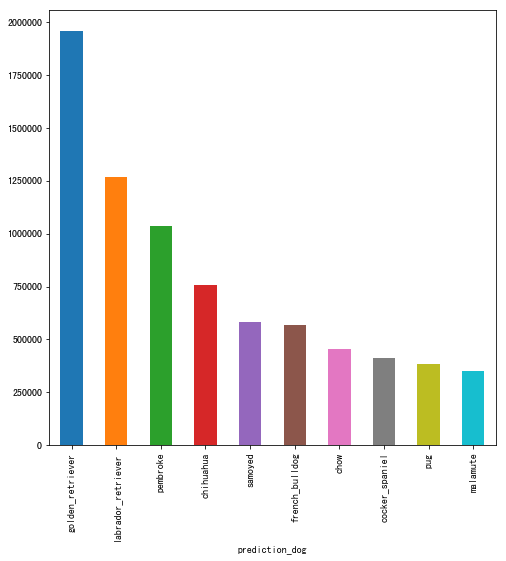

In [125]:
# 使用图表展示推特上哪些狗的喜爱数（favorite count）最多的（前10）
twitter_dogs_df.groupby(['prediction_dog'])['favorite_count'].sum().sort_values(ascending = False).head(10).plot(kind='bar',figsize=(8,8))


### 从图表可以看出（golden_retriever, labrador_retriever, pembroke, chihuahua, samoyed, french_bulldog, chow , cocker_spaniel, pug, malamute  ）这几种狗喜爱数最多，其中golden_retriever喜爱数最高

In [168]:
# 推特上哪些狗的评分（rating）最好的（前10），统计平均数
twitter_dogs_df.groupby(['prediction_dog'])['rating'].mean().sort_values(ascending=False).head(10)


prediction_dog
bouvier_des_flandres    1.300000
saluki                  1.250000
briard                  1.233333
tibetan_mastiff         1.225000
border_terrier          1.214286
silky_terrier           1.200000
standard_schnauzer      1.200000
gordon_setter           1.175000
irish_setter            1.175000
samoyed                 1.169048
Name: rating, dtype: float64

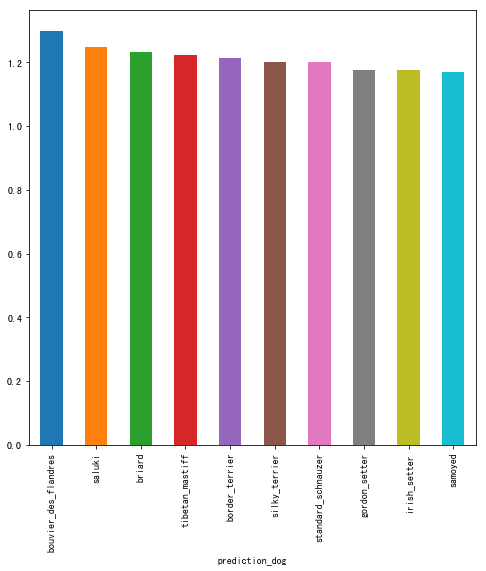

In [169]:
# 使用图表展示推特上哪些狗的评分（rating）最好的（前10）
twitter_dogs_df.groupby(['prediction_dog'])['rating'].mean().sort_values(ascending = False).head(10).plot(kind='bar',figsize=(8,8))


### 从图表可以看出(bouvier_des_flandres, saluki , tibetan_mastiff, briard , border_terrier, silky_terrier, standard_schnauzer, irish_setter, gordon_setter, samoyed )这几种狗的评分最多，其中bouvier_des_flandres评分最高

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc1bd621d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdc1a7ff1d0>]], dtype=object)

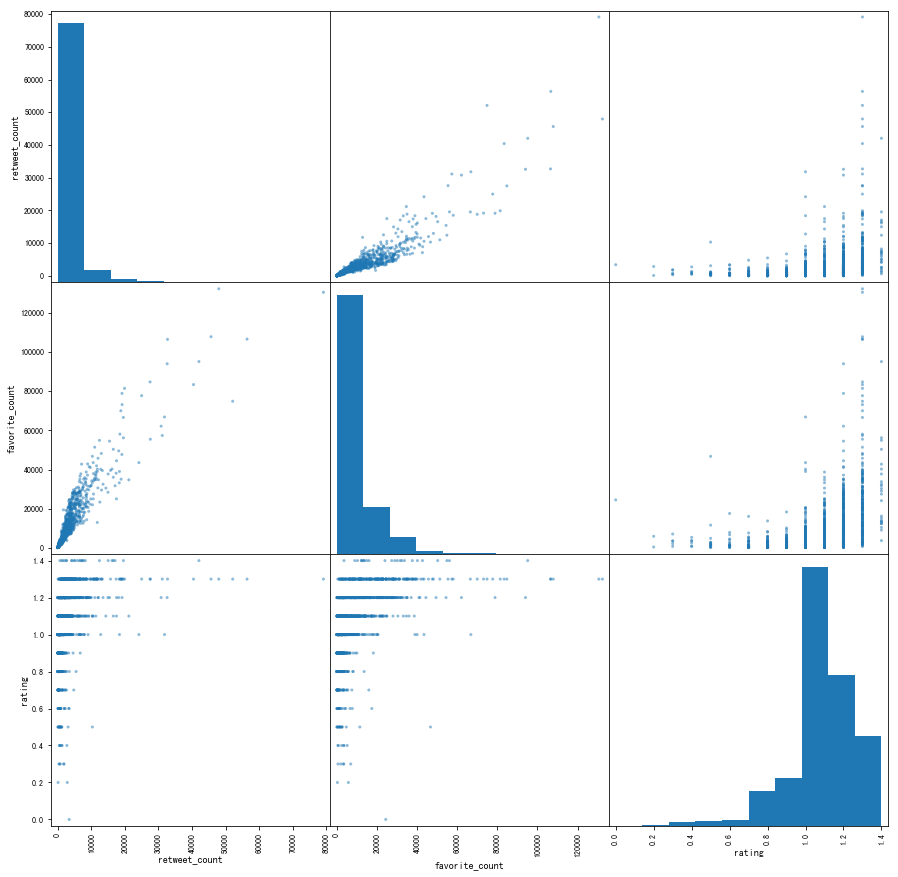

In [170]:
# 查看 转发数（retweet_count）、喜爱数（favorite_count）、评分（rating）三者之间的关系
pd.plotting.scatter_matrix(twitter_dogs_df[['retweet_count', 'favorite_count', 'rating']], figsize = (15,15))

### 从表可以看出转发数（retweet_count）、喜爱数（favorite_count）是成正比关系，转发数（retweet_count）越多，喜爱数（favorite_count）越多

In [171]:
# 查询转发数（retweet_count）、喜爱数（favorite_count）、评分（rating）三者之间的关系
twitter_dogs_rating_df = twitter_dogs_df[['retweet_count', 'favorite_count','rating']].groupby(['rating']).sum().sort_values(by=['rating'],ascending=False)
              

In [172]:
twitter_dogs_rating_df

,retweet_count,favorite_count
rating,,
1.4,217491,705740
1.3,1620295,5336408
1.2,1337762,4881004
1.1,773619,2398306
1.0,550665,1518007
0.9,112465,336911
0.8,53299,151180
0.7,27136,74782
0.6,18753,53884


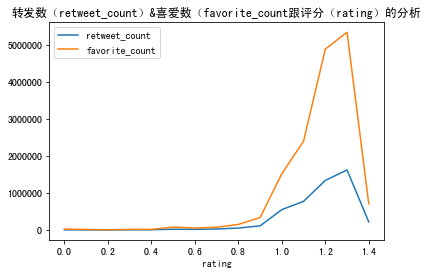

In [173]:
# 转发数（retweet_count）、喜爱数（favorite_count）分布情况

twitter_dogs_rating_df[['retweet_count','favorite_count']].plot(title='转发数（retweet_count）&喜爱数（favorite_count跟评分（rating）的分析')


#### 可以看出随着转发数（retweet_count）、喜爱数（favorite_count）越高评分一般是越高，但是不一定是最高的，在1.3评分是最高的，在评分1.3的狗转发数（retweet_count）、喜爱数（favorite_count）最多；

In [174]:
# 推特上评分最好转发数与喜爱数最多的狗是那种狗；
# 查询评分在1.3 的数据集
twitter_dogs_rating_df = twitter_dogs_df[twitter_dogs_df.rating == 1.3]

In [175]:
twitter_dogs_rating_df.head()

,tweet_id,source,jpg_url,retweet_count,favorite_count,rating,prediction_dog,prediction_conf,timestamp
1,892177421306343426,Twitter for iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6480,33786,1.3,chihuahua,chihuahua,2017-08-01 00:17:27
3,891689557279858688,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8925,42863,1.3,labrador_retriever,labrador_retriever,2017-07-30 15:58:51
5,891087950875897856,Twitter for iPhone,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,3240,20548,1.3,chesapeake_bay_retriever,chesapeake_bay_retriever,2017-07-29 00:08:17
6,890971913173991426,Twitter for iPhone,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,2142,12053,1.3,appenzeller,appenzeller,2017-07-28 16:27:12
7,890729181411237888,Twitter for iPhone,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,19548,66596,1.3,pomeranian,pomeranian,2017-07-28 00:22:40


In [176]:
# 推特上评分最好转发数与喜爱数最多的狗是那种狗；
twitter_dogs_rating_df[['prediction_dog', 'retweet_count', 'favorite_count', 'rating']].groupby(['prediction_dog'])['retweet_count', 'favorite_count'].sum().sort_values(by = ['retweet_count', 'favorite_count'],ascending=False).head(10)


,retweet_count,favorite_count
prediction_dog,,
golden_retriever,221327,766955
labrador_retriever,183281,515673
chihuahua,112137,304741
pembroke,107542,417145
samoyed,100096,281563
cocker_spaniel,86657,215879
eskimo_dog,62877,122986
lakeland_terrier,56596,153500
chow,53375,198575


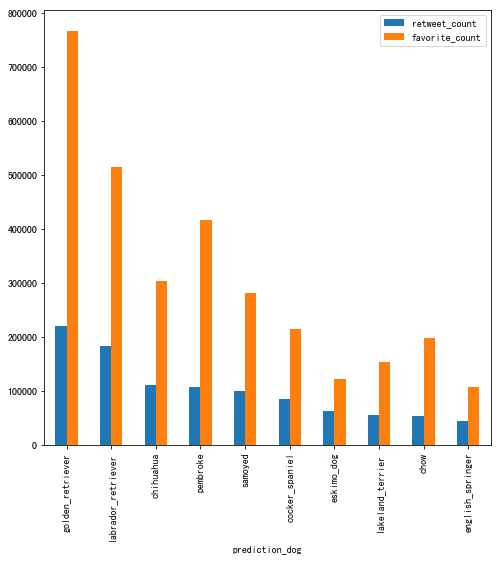

In [177]:
# 使用图表展示推特上评分最好转发数与喜爱数最多的狗是那种狗；
twitter_dogs_rating_df[['prediction_dog', 'retweet_count', 'favorite_count', 'rating']].groupby(['prediction_dog'])['retweet_count', 'favorite_count'].sum().sort_values(by = ['retweet_count', 'favorite_count'],ascending=False).head(10).plot(kind='bar',figsize=(8,8))


### 从表数据里面可以看出golden_retriever的评分最好，跟转发数（retweet_count）、喜爱数（favorite_count）最多

# 总结

### 通过分析可以得出：

- 推特上哪些狗的转发数（retweet count）最多的（前10）：（golden_retriever, labrador_retriever, chihuahua, pembroke, samoyed, cocker_spaniel, rench_bulldog, chow, pug, toy_poodle ）这几种狗转发数最多，其中golden_retriever转发数最高；
- 推特上哪些狗的喜爱数（favorite count）最多的（前10）：（golden_retriever, labrador_retriever, pembroke, chihuahua, samoyed, french_bulldog, chow , cocker_spaniel, pug, malamute ）这几种狗喜爱数最多，其中golden_retriever喜爱数最高
- 推特上哪些狗的评分（rating）最好的（前10）：(bouvier_des_flandres, saluki , tibetan_mastiff, briard , border_terrier, silky_terrier, standard_schnauzer, irish_setter, gordon_setter, samoyed )这几种狗的评分最多
- 推特上文章转发数与喜爱数的关系：转发数（retweet_count）、喜爱数（favorite_count）是成正比关系，转发数（retweet_count）越多，喜爱数（favorite_count）越多
- 推特上转发数与喜爱数最多的狗是否评分越好：随着转发数（retweet_count）、喜爱数（favorite_count）越高评分一般是越高，但是不一定是最高的，在1.3评分是最高的，在评分1.3的狗转发数（retweet_count）、喜爱数（favorite_count）最多；
- 推特上评分最好转发数与喜爱数最多的狗是那种狗：golden_retriever的评分最好，跟转发数（retweet_count）、喜爱数（favorite_count）最多